In [ ]:
"""
Purpose: To Inspect the Neurons that were really bad

"""

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty")

import datajoint_utils as du
from importlib import reload

INFO - 2021-04-24 17:36:37,432 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-24 17:36:37,435 - settings - Setting database.user to celiib
INFO - 2021-04-24 17:36:37,436 - settings - Setting database.password to newceliipass
INFO - 2021-04-24 17:36:37,440 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-04-24 17:36:37,441 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-24 17:36:37,456 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-04-24 17:36:37,901 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-24 17:36:37,905 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-24 17:36:37,906 - settings - Setting database.user to celiib
INFO - 2021-04-24 17:36:37,907 - settings - Setting database.password to newceliipass
INFO - 2021-04-24 17:36:37,907 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-24 17:36:37,908 - settings - Setting database.user to celiib
INFO - 2021-04-24 17:36:37,909 - settings - Setting database.password to newceliipass
INFO - 2021-04-24 17:36:37,911 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-24 17:36:38,409 - settings - Setting enable_python_native_blobs to True


In [3]:
#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-04-24 17:36:38,552 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-24 17:36:38,553 - settings - Setting database.user to celiib
INFO - 2021-04-24 17:36:38,554 - settings - Setting database.password to newceliipass
INFO - 2021-04-24 17:36:38,558 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-24 17:36:39,062 - settings - Setting enable_python_native_blobs to True


In [4]:
import validation_utils as vu
import neuron_visualizations as nviz
import neuron_utils as nru
import proofreading_utils as pru
import time
import system_utils as su

# Downloading the Neuron

In [5]:
seg_id = 864691136105498585
seg_id = 864691135974454383

In [6]:
#1) Dwonload the neuron object
neuron_obj = du.fetch_neuron_obj_manual(seg_id,
                                   border_validation=True)

Decompressing Neuron in minimal output mode...please wait



--- Working on filter 0:
function = axon_on_dendrite_merges
function __name__ = filter_away_axon_on_dendrite_merges
function arguments = {'use_pre_existing_axon_labels': True}



--- Working on filter 1:
function = high_degree_branching
function __name__ = filter_away_high_degree_branching
function arguments = {'offset': 1500, 'comparison_distance': 2000, 'worst_case_match_threshold': 65, 'width_diff_max': inf, 'match_threshold': 45, 'angle_buffer': 15, 'max_degree_to_resolve': 6, 'match_method': 'best_match'}




 ----- Working on coordinate [1126572.87699544  699073.01918174 1054412.97573984]--------
coordinate [1126572.87699544  699073.01918174 1054412.97573984] had error branches []--------


 ----- Working on coordinate [1146270.69919383  918285.42265269 1086061.27120456]--------
coordinate [1146270.69919383  918285.42265269 1086061.27120456] had error branches [8, 9]--------


 ----- Working on coordinate [1150781.88806206  674368.65250079 1113626.42267623]--------
coordinate [1

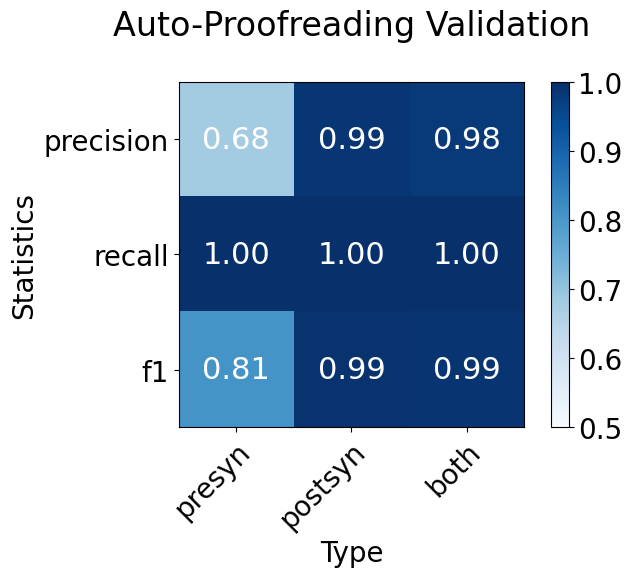

In [7]:
(filt_neuron,
 return_synapse_df_revised,
return_validation_df_revised) =  vu.filtered_neuron_score(neuron_obj = neuron_obj,   
                    filter_list = pru.v4_exc_filters(),
                    plot_limb_branch_filter_with_disconnect_effect = False,
                    verbose = True,
                    plot_score=False)

vu.synapse_validation_df_to_score_plot(return_validation_df_revised)

In [13]:
vu.plot_validation_synapses(seg_id,
                            validation_df = return_validation_df_revised,
                             synapse_dict = None,
                             synapses_type_to_plot = None,
                             synapses_type_to_not_plot = None,
                             verbose=False,
                             synapse_type = "presyn",
                             TP_color="yellow",
                            TN_color="aqua",
                            FP_color="black",
                            FN_color="orange",
                             synapse_scatter_size = 0.15,
                             
                             #for plotting the actual mesh parts to go along
                             
                             neuron_obj = filt_neuron,
                             plot_only_axon_skeleton = True,
                             error_mesh_color = "red",
                             valid_mesh_color = "green",
                             valid_skeleton_color = "black",
                             mesh_alpha = 0.3,)

Using the mesh from the neuron object


TP:yellow
TN:aqua
FP:black
FN:orange


In [15]:
ed.webbing_t_errors_limb_branch_dict(filt_neuron,
                                     axon_only = True,
                                #child_width_maximum = 75,
                                parent_width_maximum = 75,
                                plot_two_downstream_thin_axon_limb_branch = True,
                                plot_wide_angled_children = False,
                                error_if_web_is_none = True,
                                verbose = True,

                                #arguments for the web thresholding
                                web_size_threshold=120,
                                web_size_type="ray_trace_median",
                                web_above_threshold = True,

                                plot_web_errors = True,
                                    child_skeletal_threshold = 1000)


 Working on visualization type: mesh


two_downstream_thin_axon_limb_branch = {'L2': array([ 8, 47, 54, 59, 65, 70, 71, 72])}
wide_angled_children= {'L2': array([ 8, 72])}
Web size = 182.2413024095692
Web size = 219.3191332103299
Final web t error limb branch dict = {}

 Working on visualization type: mesh


No color dictionary to return because plot_items_order or color_list_correct_size empty


{}